### Some Theory

##### Types of data used for I/O:
- Text - '12345' as a sequence of unicode chars
- Binary - 12345 as a sequence of bytes of its binary equivalent

##### Hence there are 2 file types to deal with
- Text files - All program files are text files
- Binary Files - Images,music,video,exe files

### How File I/O is done in most programming languages

- Open a file
- Read/Write data
- Close the file

### Writing to a file

In [5]:
open('sagar.txt','r')

In [ ]:
open('sagar.txt', 'w')

<_io.TextIOWrapper name='sagar.txt' mode='w' encoding='UTF-8'>

In [6]:
# case 1 - if the file is not present
f = open('sample.txt','w')
f.write('Hello world')
f.close()

# f.close because 2 reason 
# save memory: when open then it is open in RAM (buffer )
# security: it is open in RAM so anyone can edit it (hacking it)

In [7]:
# since file is closed hence this will not work
f.write('hello')

ValueError: ignored

In [8]:
# write multiline strings
# 'w' : write mode
f = open('sample1.txt','w')
f.write('hello world')
f.write('\nhow are you?')
f.close()

In [9]:
# case 2 - if the file is already present then replace privious content by new content
f = open('sample.txt','w')
f.write('anaji kadam')
f.close()

In [10]:
# How exactly open() works?
# - a file is usually on the hard drive
# - python goes and gets the file from hard drive to buffer memory
# - all operations are being done on the buffer
# - after closing file goes back to hard drive with changes

In [11]:
# Problem with w mode : replace old content
# 'a' append mode
# introducing append mode
f = open('/content/sample1.txt','a')
f.write('\nI am fine')
f.close()

In [19]:
# write lines : multiple line
L = {'hello\n','hi\n','how are you\n','I am fine\n'}

f = open('/content/sample2.txt','w')
f.writelines(L)
f.close()

In [20]:
# read -> reading from files
# -> using read()
f = open('/content/sample1.txt','r')
s = f.read()
print(s)
f.close()

hello world
how are you?
I am fine


In [21]:
# reading upto n chars
f = open('/content/sample1.txt','r')
s = f.read(15)
print(s)
f.close()

hello world
how


In [22]:
# readline() -> to read line by line
f = open('/content/sample1.txt','r')
print(f.readline(), end='')
print(f.readline(), end='')
f.close()

hello world
how are you?


In [23]:
f = open('/content/sample1.txt','r')
print(f.readline())
print(f.readline())
f.close()

hello world

how are you?



In [24]:
# reading entire using readline
f = open('/content/sample1.txt','r')

while True:

  data = f.readline()

  if data == '':
    break
  else:
    print(data,end='')

f.close()

hello world
how are you?
I am fine

In [25]:
# alternate better way
f = open('/content/sample1.txt','r')

lines_count = 0
while f.readline() != '':
    lines_count += 1

f.close()
print(lines_count)

3


### Using Context Manager (With)

- It's a good idea to close a file after usage as it will free up the resources
- If we dont close it, garbage collector would close it
- with keyword closes the file as soon as the usage is over

In [27]:
# with
with open('/content/sam.txt','w') as f:
    f.write('selmon bhai')

In [28]:
f.write('hello')

ValueError: ignored

In [29]:
# try f.read() now
with open('/content/sample1.txt','r') as f:
    print(f.readline())

hello world



In [33]:
# moving within a file -> 10 char then 10 char
with open('sample1.txt','r') as f:
    print(f.read(10))
    print(f.read(10))
    # print(f.read(10))
    # print(f.read(10))

hello worl
d
how are 


In [37]:
# benefit? -> to load a big file in memory
big_L = [str(i)+': hello world ' for i in range(1000)]

with open('big.txt','w') as f:
  f.writelines(big_L)


In [40]:
with open('big.txt','r') as f:

  chunk_size = 10
  # print(f.read(chunk_size))  # take first 10 char
  data = f.read(chunk_size)  
  # now 'data' has first 10 characters in big.txt
  while len(data) > 0:
    print(data, end='***')

    # get next 10 characters in big.txt
    data = f.read(chunk_size)

0: hello w***orld 1: he***llo world ***2: hello w***orld 3: he***llo world ***4: hello w***orld 5: he***llo world ***6: hello w***orld 7: he***llo world ***8: hello w***orld 9: he***llo world ***10: hello ***world 11: ***hello worl***d 12: hell***o world 13***: hello wo***rld 14: he***llo world ***15: hello ***world 16: ***hello worl***d 17: hell***o world 18***: hello wo***rld 19: he***llo world ***20: hello ***world 21: ***hello worl***d 22: hell***o world 23***: hello wo***rld 24: he***llo world ***25: hello ***world 26: ***hello worl***d 27: hell***o world 28***: hello wo***rld 29: he***llo world ***30: hello ***world 31: ***hello worl***d 32: hell***o world 33***: hello wo***rld 34: he***llo world ***35: hello ***world 36: ***hello worl***d 37: hell***o world 38***: hello wo***rld 39: he***llo world ***40: hello ***world 41: ***hello worl***d 42: hell***o world 43***: hello wo***rld 44: he***llo world ***45: hello ***world 46: ***hello worl***d 47: hell***o world 48***: hello wo**

In [41]:
big_L = [str(i)+': hello world\n' for i in range(1000)]

with open('big1.txt','w') as f:
  f.writelines(big_L)

In [42]:
with open('big1.txt','r') as f:
  print(f.readlines())
  # chunk_size = 18

  # while len(f.read(chunk_size)) > 0:
  #   print(f.read(chunk_size),)
  #   f.read(chunk_size)

['0: hello world\n', '1: hello world\n', '2: hello world\n', '3: hello world\n', '4: hello world\n', '5: hello world\n', '6: hello world\n', '7: hello world\n', '8: hello world\n', '9: hello world\n', '10: hello world\n', '11: hello world\n', '12: hello world\n', '13: hello world\n', '14: hello world\n', '15: hello world\n', '16: hello world\n', '17: hello world\n', '18: hello world\n', '19: hello world\n', '20: hello world\n', '21: hello world\n', '22: hello world\n', '23: hello world\n', '24: hello world\n', '25: hello world\n', '26: hello world\n', '27: hello world\n', '28: hello world\n', '29: hello world\n', '30: hello world\n', '31: hello world\n', '32: hello world\n', '33: hello world\n', '34: hello world\n', '35: hello world\n', '36: hello world\n', '37: hello world\n', '38: hello world\n', '39: hello world\n', '40: hello world\n', '41: hello world\n', '42: hello world\n', '43: hello world\n', '44: hello world\n', '45: hello world\n', '46: hello world\n', '47: hello world\n', '

In [43]:
with open('big1.txt','r') as f:
  print(f.read())

0: hello world
1: hello world
2: hello world
3: hello world
4: hello world
5: hello world
6: hello world
7: hello world
8: hello world
9: hello world
10: hello world
11: hello world
12: hello world
13: hello world
14: hello world
15: hello world
16: hello world
17: hello world
18: hello world
19: hello world
20: hello world
21: hello world
22: hello world
23: hello world
24: hello world
25: hello world
26: hello world
27: hello world
28: hello world
29: hello world
30: hello world
31: hello world
32: hello world
33: hello world
34: hello world
35: hello world
36: hello world
37: hello world
38: hello world
39: hello world
40: hello world
41: hello world
42: hello world
43: hello world
44: hello world
45: hello world
46: hello world
47: hello world
48: hello world
49: hello world
50: hello world
51: hello world
52: hello world
53: hello world
54: hello world
55: hello world
56: hello world
57: hello world
58: hello world
59: hello world
60: hello world
61: hello world
62: hello world
63

In [44]:
with open('sample1.txt','r') as f:
  print(f.read())

hello world
how are you?
I am fine


In [45]:
# seek and tell function
with open('sample1.txt','r') as f:
  f.seek(0)                 # f.seek() start read file from what position
  print(f.read(10))
  print(f.tell())           # after read 1st 10 char where is the cursor position
  
  print(f.read(10))
  print(f.tell())

hello worl
10
d
how are 
20


In [46]:
# seek during write
with open('sam2.txt','w') as f:
  f.write('Hello')
  f.seek(0)
  f.write('Xe')

### Problems with working in text mode

- can't work with binary files like images
- not good for other data types like int/float/list/tuples

In [47]:
# working with binary file
with open('index.jpeg','r') as f:
  f.read()

UnicodeDecodeError: ignored

In [48]:
# working with binary file
with open('index.jpeg','rb') as f:
  with open('index_copy.jpeg','w') as wf:
    wf.write(f.read())

TypeError: ignored

In [49]:
# working with binary file
with open('index.jpeg','rb') as f:
  with open('index_copy.jpeg','wb') as wf:
    wf.write(f.read())

In [50]:
# working with a big binary file

In [51]:
# working with other data types  : only string
with open('sample.txt','w') as f:
  f.write(5)

TypeError: ignored

In [52]:
with open('int.txt','w') as f:
  f.write('5')

In [53]:
with open('int.txt','r') as f:
  print(int(f.read()) + 5)

10


In [54]:
# more complex data
d = {
    'name':'nitish',
     'age':33,
     'gender':'male'
}

with open('sample.txt','w') as f:
  f.write(str(d))

In [55]:
with open('sample.txt','r') as f:
  print(f.read())
  print(type(f.read()))

{'name': 'nitish', 'age': 33, 'gender': 'male'}
<class 'str'>


In [56]:
with open('sample.txt','r') as f:
  print(dict(f.read()))

ValueError: ignored

### Serialization and Deserialization

- **Serialization** - process of converting python data types to JSON format
- **Deserialization** - process of converting JSON to python data types

#### What is JSON?


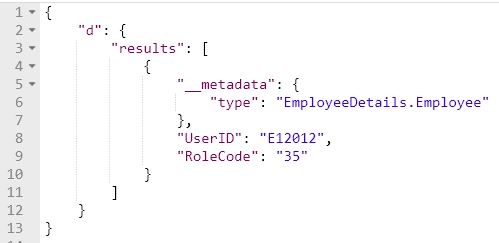

In [57]:
# serialization using json module
# list
import json

L = [1,2,3,4]

with open('demo.json','w') as f:
  json.dump(L,f)


In [58]:
# dict
d = {
    'name':'nitish',
     'age':33,
     'gender':'male'
}

with open('demo1.json','w') as f:
  json.dump(d,f,indent=4)

In [59]:
# deserialization : json file to py data type
import json

with open('demo.json','r') as f:
  d = json.load(f)
  print(d)
  print(type(d))

[1, 2, 3, 4]
<class 'list'>


In [60]:
with open('demo1.json','r') as f:
  d = json.load(f)
  print(d)
  print(type(d))

{'name': 'nitish', 'age': 33, 'gender': 'male'}
<class 'dict'>


In [61]:
# serialize and deserialize tuple
import json

t = (1,2,3,4,5)   # always tuple serialize as list in json file 

with open('demo.json','w') as f:
  json.dump(t,f)

In [63]:
with open('demo.json','r') as f:
    d = json.load(f)
    print(d)
    print(type(d))

[1, 2, 3, 4, 5]
<class 'list'>


In [64]:
# serialize and deserialize a nested dict

d = {
    'student':'nitish',
     'marks':[23,14,34,45,56]
}

with open('demo1.json','w') as f:
  json.dump(d,f)

In [65]:
with open('demo1.json','r') as f:
  d = json.load(f)
  print(d)
  print(type(d))

{'student': 'nitish', 'marks': [23, 14, 34, 45, 56]}
<class 'dict'>


In [66]:
# dump : dump as json in original datatype
# dumps : convert string and then dump to json

### Serializing and Deserializing custom objects

In [67]:
class Person:

  def __init__(self,fname,lname,age,gender):
    self.fname = fname
    self.lname = lname
    self.age = age
    self.gender = gender

# format to printed in
# -> Nitish Singh age -> 33 gender -> male

In [68]:
person = Person('Nitish','Singh',33,'male')

In [69]:
isinstance(person, Person)

True

In [70]:
# As a string
import json

def show_object(person):
  if isinstance(person, Person):
    return "{} {} age -> {} gender -> {}".format(person.fname,person.lname,person.age,person.gender)

with open('demo11.json','w') as f:
  json.dump(person, f, default = show_object)

In [71]:
# As a dict
import json

def show_object(person):
  if isinstance(person,Person):
    return {'name':person.fname + ' ' + person.lname,'age':person.age,'gender':person.gender}

with open('demo.json','w') as f:
  json.dump(person,f,default=show_object,indent=4)

In [72]:
# indent arrtribute
# As a dict

In [73]:
# deserializing
import json

with open('demo.json','r') as f:
  d = json.load(f)
  print(d)
  print(type(d))

{'name': 'Nitish Singh', 'age': 33, 'gender': 'male'}
<class 'dict'>


### Pickling
`Pickling` is the process whereby a Python object hierarchy is converted into a byte stream, and `unpickling` is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy.

In [74]:
class Person:

  def __init__(self,name,age):
    self.name = name
    self.age = age

  def display_info(self):
    print('Hi my name is',self.name,'and I am ',self.age,'years old')

In [75]:
p = Person('nitish',33)

In [76]:
# pickle dump
import pickle
with open('person.pkl','wb') as f:
  pickle.dump(p,f)

In [77]:
# pickle load
import pickle
with open('person.pkl','rb') as f:
  p = pickle.load(f)

p.display_info()

Hi my name is nitish and I am  33 years old


### Pickle Vs Json

- Pickle lets the user to store data in binary format. JSON lets the user store data in a human-readable text format.